In [ ]:
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import matplotlib.pyplot as plt

## Exponential Function

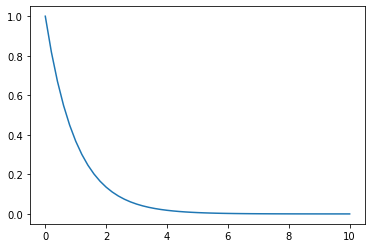

In [ ]:
# plot exponential function with given lamb
lamb  = 1
rng = np.linspace(0, 10, 51)
s   = pd.Series(data=lamb*np.exp(-lamb*rng), index=rng)

plt.plot(s)

In [ ]:
# wrap exponential in function
def get_exponential(x, lamb):
  return lamb*np.exp(-lamb*x)

# integrate over given function between lower & upper bound
def get_actual(dist_func, lower, upper, args):
  proba, error = integrate.quad(dist_func, lower, upper, args=args)
  return proba

In [ ]:
# integrating from 0 to inf gives proba of 1
get_actual(dist_func=get_exponential, lower=0, upper=np.inf, args=lamb)

1.0000000000000002

## Markov & Chebyshev Inequality

In [ ]:
def get_markov(a, mu):
  return mu/a

def get_chebyshev(c, sigma):
  return sigma**2/c**2

# set extreme value to test inequalities
a = 2

# calculate actual proba by integrating from a to inf
proba_actual = get_actual(dist_func=get_exponential, lower=a, upper=np.inf, args=lamb)

# apply inequalities to extreme value
proba_markov    = get_markov(a=a, mu=lamb)
proba_chebyshev = get_chebyshev(c=a, sigma=lamb)

print('Actual P(X>=a) ', proba_actual)
print('Markov P(X>=a) ', proba_markov)
print('Chebyshev P(X>=a) ', proba_chebyshev)

Actual P(X>=a)  0.13533528323661267
Markov P(X>=a)  0.5
Chebyshev P(X>=a)  0.25


## Compare Performance

In [ ]:
rng_1 = np.linspace(lamb, 10, 100)

# vectorize functions to be applied to np.array
vect_actual    = np.vectorize(get_actual)
vect_markov    = np.vectorize(get_markov)
vect_chebyshev = np.vectorize(get_chebyshev)

# test different extreme values
lst_actual    = pd.Series(vect_actual(dist_func=get_exponential, lower=rng_1, upper=np.inf, args=lamb), rng_1)
lst_markov    = pd.Series(vect_markov(a=rng_1, mu=lamb), rng_1)
lst_chebyshev = pd.Series(vect_chebyshev(c=rng_1, sigma=lamb), rng_1)

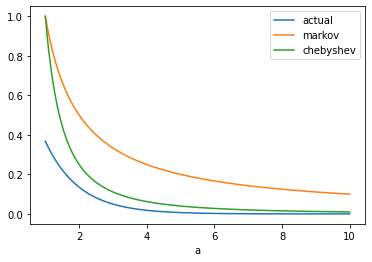

In [ ]:
plt.plot(lst_actual, label='actual')
plt.plot(lst_markov, label='markov')
plt.plot(lst_chebyshev, label='chebyshev')
plt.legend()
plt.xlabel('a')
plt.show()